## 웹크롤링 - 워드클라우드 시각화 
- 웹 크롤링(NAVER) : NAVER 뉴스 분석
- 워드클라우드 시각화 
- 데이터
    - naverNews_aed_wordcloud.png

In [1]:
! pip install pyautogui

In [2]:
! pip install konlpy

In [3]:
! pip install pytagcloud

In [4]:
! pip install pygame

In [5]:
! pip install simplejson

In [6]:
! pip install wordcloud

In [62]:
import pyautogui as pya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import re # 정규식 표현을 위한 모듈
import time
import warnings
warnings.filterwarnings("ignore")
import konlpy
from konlpy.tag import Okt
from collections import Counter
import random
import pytagcloud
import webbrowser
from PIL import Image
from wordcloud import WordCloud

In [71]:
keyword = pya.prompt("검색어를 입력하세요.")
lastpage = int(pya.prompt("마지막 페이지 번호를 입력하세요."))
titleList = []
for i in range(1, lastpage*10, 10) :
    response = requests.get(f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start=[i]")
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    titles = soup.select("a.news_tit")
    subtitles = soup.select("a.elss.sub_tit")
    
    for title in titles : # titles에서 title
        titleText = title.text # title.text만 추출
        titleList.append(titleText) # titleList에 추가

In [72]:
def text_cleaning(text) : # 한글 추출
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result
titleList = list(map(lambda x:text_cleaning(x), titleList)) # 전처리

In [73]:
title_corpus = " ".join(titleList) # 말뭉치
nouns_tagger = Okt() # 명사 추출
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns) # 각 명사의 빈도수 계산

In [74]:
remove_char_counter = Counter({x:count[x] for x in count if len(x) > 1})
korean_stopwords_path = "C:/sooeun/DATAexam/전공프로젝트(빅데이터)/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines() # 불용어 텍스트 파일 > f로 치환
stopwords = [x.strip() for x in stopwords]
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명',
                       '표기', '추가', '모든', '사용', '매우', '가장', '줄거리',
                       '요소', '상황', '편집', '틀', '경우', '때문', '모습',
                       '정도', '이후', '사실', '생각', '인물', '이름', '년월']
for stopword in namu_wiki_stopwords: 
    stopwords.append(stopword) # 불용어 추가

In [75]:
remove_char_counter = Counter({x : remove_char_counter[x]
                               for x in count if x not in stopwords})
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

In [76]:
ranked_tags = remove_char_counter.most_common(40) # 빈도순 40개 단어
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'naverNews_aed.png',
                            size=(1200, 800), fontname='Korean',
                            rectangular=False)

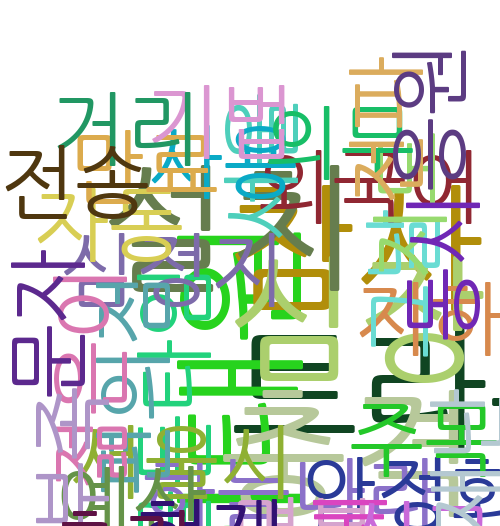

In [77]:
from IPython.display import Image
pytagcloud.create_tag_image(taglist, 'naverNews_aed.png',
                            size=(500, 700), fontname='Korean',
                            rectangular=False) 
Image(filename='naverNews_aed.png') #출력

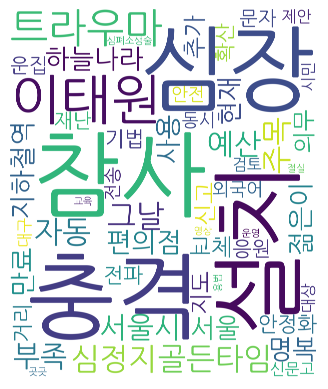

In [78]:
wc = WordCloud(font_path="C:/sooeun/DATAexam/전공프로젝트(빅데이터)/NanumGothic.ttf", width=2000, height=2400,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(remove_char_counter)

# 셀 분리

plt.figure()
plt.imshow(gen)
plt.axis('off')
plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/naverNews_aed_wordcloud.png")